In [2]:
import keras
from keras.layers import Activation
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Model
from keras.layers import Input
from keras.layers import BatchNormalization
from keras.layers import UpSampling2D
from keras.layers import Concatenate
from keras.layers import Lambda 
from keras.utils import to_categorical
import tensorflow as tf
from keras.layers import Add 

from keras.layers import Reshape

from keras import backend as K
from keras import regularizers, optimizers
%matplotlib inline

Using TensorFlow backend.


In [3]:
import scipy.io as scio
import numpy as np    
import os
import matplotlib.pyplot as plt
import math
import re
from scipy.misc import imsave
from scipy import ndimage, misc
from numpy import unravel_index
from operator import sub

In [4]:
from keras.callbacks import ReduceLROnPlateau, CSVLogger,EarlyStopping,ModelCheckpoint

In [5]:
x = np.load('total_images.npy')

In [6]:
y = np.load('ground_truth.npy')

In [7]:
x.shape

(2000, 256, 128, 3)

In [8]:
y.shape

(2000, 256, 128)

In [9]:
train_indices = np.random.choice(2000,1500,replace = False)
print(sorted(train_indices))
x_train_images = []
y_train_labels = [] 
for i in train_indices:
    x_train_images.append(x[i])
    y_train_labels.append(y[i])

test_indices = [xy for xy in range(2000) if xy not in train_indices]
print(test_indices)
x_test_images = []
y_test_labels = []

for i in test_indices:
    x_test_images.append(x[i])
    y_test_labels.append(y[i])


[0, 1, 2, 4, 5, 6, 9, 11, 14, 15, 16, 17, 18, 19, 21, 22, 24, 27, 29, 30, 31, 33, 34, 36, 37, 38, 39, 40, 42, 43, 45, 47, 48, 49, 50, 51, 52, 53, 56, 57, 59, 60, 62, 63, 64, 65, 66, 68, 69, 71, 75, 76, 77, 78, 80, 82, 83, 84, 89, 90, 93, 94, 95, 97, 98, 99, 100, 101, 102, 104, 106, 107, 111, 113, 114, 115, 116, 117, 118, 119, 120, 122, 123, 125, 126, 127, 130, 131, 133, 134, 135, 136, 139, 141, 142, 143, 144, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 158, 159, 161, 162, 163, 164, 166, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 181, 183, 184, 185, 186, 187, 188, 189, 190, 191, 193, 194, 195, 196, 198, 199, 200, 201, 202, 203, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 219, 221, 223, 224, 225, 228, 230, 231, 232, 235, 236, 237, 239, 240, 241, 243, 244, 245, 246, 247, 249, 250, 251, 252, 253, 255, 256, 257, 258, 259, 260, 261, 262, 263, 265, 266, 267, 269, 270, 271, 273, 274, 276, 277, 278, 282, 283, 284, 286, 287, 288, 290, 291, 295, 296, 29

In [10]:
x_train = np.array(x_train_images)

In [11]:
x_train.shape

(1500, 256, 128, 3)

In [12]:
x_test = np.array(x_test_images)

In [13]:
x_test.shape

(500, 256, 128, 3)

In [14]:
y_train = np.array(y_train_labels)

In [15]:
y_train.shape

(1500, 256, 128)

In [16]:
y_test = np.array(y_test_labels)

In [17]:
y_test.shape

(500, 256, 128)

In [18]:
y_test.dtype

dtype('uint8')

In [19]:
#z-score
mean = np.mean(x_train,axis=(0,1,2,3))
std = np.std(x_train,axis=(0,1,2,3))
x_train = (x_train-mean)/(std+1e-7)
x_test = (x_test-mean)/(std+1e-7)

In [20]:
np.save("x_train2.npy",x_train)
np.save("x_test2.npy", x_test)
np.save("y_train2.npy",y_train)
np.save("y_test2,npy", y_test)

In [9]:
x_train = np.load('x_train2.npy')
x_test = np.load('x_test2.npy')
y_train = np.load('y_train2.npy')
y_test = np.load('y_test2,npy.npy')

In [21]:
rows = 256
cols = 128

In [10]:
data_shape = 216*64
weight_decay = 0.0001

In [11]:
# Defines the input tensor
inputs = Input(shape=(None,None,3))

L1 = Conv2D(64,kernel_size=(3,3),padding = "same",kernel_regularizer=regularizers.l2(weight_decay))(inputs)
L2 = BatchNormalization()(L1)
L2 = Activation('relu')(L2)
#L3 = Lambda(maxpool_1,output_shape = shape)(L2)
L3 = MaxPooling2D(pool_size=(2,2))(L2)
L4 = Conv2D(128,kernel_size=(3,3),padding = "same",kernel_regularizer=regularizers.l2(weight_decay))(L3)
L5 = BatchNormalization()(L4)
L5 = Activation('relu')(L5)
#L6 = Lambda(maxpool_2,output_shape = shape)(L5)
L6 = MaxPooling2D(pool_size=(2,2))(L5)
L7 = Conv2D(128,kernel_size=(3,3),padding = "same",kernel_regularizer=regularizers.l2(weight_decay))(L6)
L8 = BatchNormalization()(L7)
L9 = Activation('relu')(L8)
L10 = Conv2D(128,(3,3),dilation_rate= (2,2), padding = "same", activation='relu', name = "conv_dil_1")(L9)
L11 = BatchNormalization()(L10)
L12 = Activation('relu')(L11)
L13 = Conv2D(128,(3,3),dilation_rate= (4,4), padding = "same", activation='relu', name = "conv_dil_2")(L12)
L14 = BatchNormalization()(L13)
L15 = Activation('relu')(L14)
L16 = Conv2D(128,(3,3),dilation_rate= (8,8), padding = "same", activation='relu', name = "conv_dil_3")(L15)
L17 = BatchNormalization()(L16)
L18 = Activation('relu')(L17)
L19 = Conv2D(128,kernel_size=(3,3),padding = "same",kernel_regularizer=regularizers.l2(weight_decay),
             name="skip_conv_1")(L6)
L20 = Add()([L18,L19])
L21 = UpSampling2D( size = (2,2)) (L20)
#L21 = Deconvolution2D(128, kernel_size = (3,3), strides = (2,2), activation = "relu", 
 #                     name = "ct_deconv_1", padding = "same")(L20)
L21 = Conv2D(128,(3,3), padding = "same", kernel_regularizer=regularizers.l2(weight_decay))(L21)
L22 = BatchNormalization()(L21)
L23 = Activation('relu')(L22)
L24 = Conv2D(128,kernel_size=(3,3),padding = "same",kernel_regularizer=regularizers.l2(weight_decay),
             name="skip_conv_2")(L3)
L24 = Add()([L23,L24])
L25 = UpSampling2D(size = (2,2))(L24)
L25 = Conv2D(64, (3,3), padding = "same", kernel_regularizer=regularizers.l2(weight_decay))(L25)
#L25 = Deconvolution2D(64, kernel_size = (3,3), strides = (2,2), activation = "relu", 
 #                     name = "ct_deconv_2", padding = "same")(L24)
#L25 = 
L26 = BatchNormalization()(L25)
L27 = Activation('relu')(L26)
L28 = Conv2D(1,kernel_size=(1,1),padding = "same",kernel_regularizer=regularizers.l2(weight_decay))(L27)#

L30 = Activation('sigmoid')(L28)
model = Model(inputs = inputs, outputs = L30)
model.summary()


____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_1 (InputLayer)             (None, None, None, 3) 0                                            
____________________________________________________________________________________________________
conv2d_1 (Conv2D)                (None, None, None, 64 1792                                         
____________________________________________________________________________________________________
batch_normalization_1 (BatchNorm (None, None, None, 64 256                                          
____________________________________________________________________________________________________
activation_1 (Activation)        (None, None, None, 64 0                                            
___________________________________________________________________________________________

In [12]:
x_train.shape

(1500, 256, 128, 3)

In [13]:
x_test.shape

(500, 256, 128, 3)

In [14]:
y_train.shape

(1500, 256, 128)

In [15]:
y_train = y_train.reshape(y_train.shape[0],256,128,1)

In [16]:
y_test = y_test.reshape(y_test.shape[0],256,128,1)

In [17]:
smooth = 1

In [18]:
def dice_coef(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)


In [19]:
def dice_coef_loss(y_true, y_pred):
    return -dice_coef(y_true, y_pred)

In [20]:
def customized_loss(y_true,y_pred):
    return (1*K.binary_crossentropy(y_true, y_pred))+(0.5*dice_coef_loss(y_true, y_pred))

In [21]:
optimiser = optimizers.Adam(lr = 0.01)

In [22]:
model.compile(optimizer=optimiser,loss=dice_coef_loss,metrics=['accuracy',dice_coef])

In [23]:
#Defining Callback functions which will be called by model during runtime when specified condition satisfies
lr_reducer = ReduceLROnPlateau(factor=0.5, cooldown=0, patience=6, min_lr=0.5e-6)
csv_logger = CSVLogger('segmentation_lr_e2_bs4.csv')
model_chekpoint = ModelCheckpoint("segmentation_lr_e2_bs4.hdf5",monitor = 'val_loss',verbose = 1,save_best_only=True)

In [24]:
model.fit(x_train,y_train,batch_size=4,epochs=200,validation_data=(x_test, y_test),callbacks=[lr_reducer, csv_logger,model_chekpoint])

Train on 1500 samples, validate on 500 samples
Epoch 1/200
1500/1500 [==============================] - 496s - loss: -0.5415 - acc: 0.8524 - dice_coef: 0.6148 - val_loss: -0.5443 - val_acc: 0.8490 - val_dice_coef: 0.6322
Epoch 2/200
1500/1500 [==============================] - 488s - loss: -0.6840 - acc: 0.9031 - dice_coef: 0.7295 - val_loss: -0.6818 - val_acc: 0.9088 - val_dice_coef: 0.7294
Epoch 3/200
1500/1500 [==============================] - 488s - loss: -0.7350 - acc: 0.9197 - dice_coef: 0.7747 - val_loss: -0.5421 - val_acc: 0.8939 - val_dice_coef: 0.5737
Epoch 4/200
1500/1500 [==============================] - 488s - loss: -0.7573 - acc: 0.9262 - dice_coef: 0.7916 - val_loss: -0.7366 - val_acc: 0.9236 - val_dice_coef: 0.7709
Epoch 5/200
1500/1500 [==============================] - 488s - loss: -0.7752 - acc: 0.9301 - dice_coef: 0.8029 - val_loss: -0.5978 - val_acc: 0.8961 - val_dice_coef: 0.6275
Epoch 6/200
1500/1500 [==============================] - 488s - loss: -0.7816 - acc

KeyboardInterrupt: 

In [25]:
model.load_weights('segmentation_lr_e2_bs4.hdf5')

In [28]:
x[3].shape

(256, 128, 3)

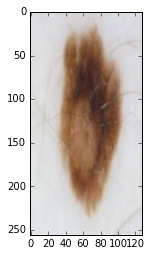

In [30]:
plt.imshow(x[3])

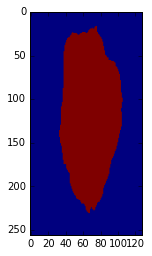

In [31]:
plt.imshow(y[3])

In [32]:
y_test[0].shape

(256, 128, 1)

In [33]:
gt = y_test[0].reshape((256,128))

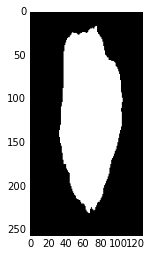

In [34]:
plt.imshow(gt, cmap = "gray")

In [39]:
testing_image = x_test[0].reshape((1,256,128,3))

In [40]:
prediction = model.predict(testing_image)

In [42]:
prediction.shape

(1, 256, 128, 1)

In [43]:
prediction = prediction.reshape((256,128))

In [49]:
sample = prediction > 0.5

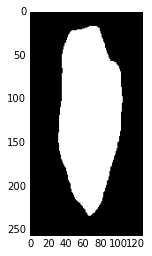

In [51]:
plt.imshow(sample, cmap = "gray")

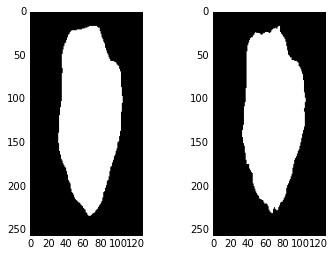

In [53]:
plt.subplot(1,2,1)
plt.imshow(sample, cmap = "gray")
plt.subplot(1,2,2)
plt.imshow(gt, cmap = "gray")